## SAGE Dataset Exploratory Analysis

In [1]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading Data

In [2]:
## Reading data
dfActivities = pd.read_csv('activities.csv')
dfCandidates = pd.read_csv('candidateprogress.csv')
dfRequisition = pd.read_csv('requisition.csv')

In [3]:
## Activities
dfActivities.head(5)

,Date,Candidate ID,Candidate Name,Sage Representative,Requisition,Type of Activity
0,1/2/2019 9:47:40 AM,373,Paul Horn,Ashley Alfred,NaN,Email Received
1,1/2/2019 5:59:01 PM,1073,Robert Crank,Ashley Alfred,NaN,Email Received
2,1/3/2019 11:11:36 AM,787,Kenneth Friedt,Ashley Alfred,NaN,Email Received
3,1/3/2019 3:06:40 PM,787,Kenneth Friedt,Ashley Alfred,NaN,Email Received
4,1/3/2019 4:46:06 PM,809,Sue Fannin,Ashley Alfred,NaN,Email Received


In [4]:
## Candidates
dfCandidates.head(5)

,Requisition,Candidate ID,Candidate Name,Progress Item,Date
0,AA155723314,0,Bernard Jordan,Pipelined,20180316
1,AA155723314,1,Rosa Moreno,Submitted,20180314
2,AA155723314,2,Mireya Cook,Pipelined,20180316
3,AA155723314,3,Jennifer Youmans,Pipelined,20180321
4,AA155723314,4,Lori Hernandez,Pipelined,20180323


In [5]:
## Requisition
dfRequisition.head(5)

,Requisition,Date Created,Company,Job Title,Salary,SAGE Fee,Status,Hired Date
0,SD327202314,03/14/2018,The Working Group,Designer Lead,86000.0,14620.0,Completed,"Jun 3, 2018"
1,MM702120613,06/13/2018,CaseWare International Inc.,Senior Developer - Cloud Analytics,110000.0,18700.0,Completed,"Aug 7, 2018"
2,MM618861419,04/19/2018,CaseWare International Inc.,Development Lead,150000.0,27000.0,Completed,"Jun 11, 2018"
3,AA20756542,04/02/2018,1Password,Backend Developer,80000.0,14400.0,Completed,"Jun 26, 2018"
4,SD605017126,01/26/2018,ThinkData Works,Ruby Developer,110000.0,18700.0,Completed,"Feb 26, 2018"


### Data Cleaning - Activities

In [6]:
dfActivities.columns
## Good!

Index(['Date', 'Candidate ID', 'Candidate Name', 'Sage Representative',
       'Requisition', 'Type of Activity'],
      dtype='object')

In [7]:
dfActivities.describe()
## Not much info here since there's only one quantitative variable

,Candidate ID
count,6010.000000
mean,1307.660899
std,608.245997
min,0.000000
25%,835.000000
50%,1502.000000
75%,1848.000000
max,2144.000000


In [8]:
## Null data
pd.isnull(dfActivities).sum()
## Seems like a vast majority do not have a 'Requisition' value. Need to investigate what that is.

Date                      0
Candidate ID              0
Candidate Name            0
Sage Representative       0
Requisition            4399
Type of Activity          0
dtype: int64

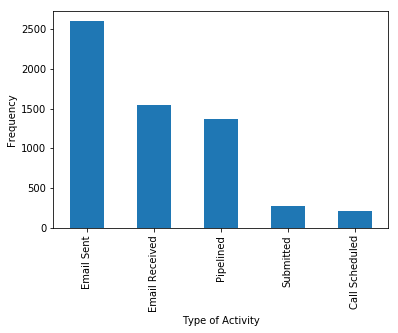

In [60]:
## What are the most frequent communications without requisition?
dfNullActivities = dfActivities.groupby(by='Type of Activity').count()
dfNullActivities.sort_values(by='Candidate ID', ascending=False)['Candidate ID'].plot.bar()
plt.xlabel('Type of Activity')
plt.ylabel('Frequency')
plt.show() 

In [10]:
# Check types
dfActivities.dtypes
## Not date time format

Date                   object
Candidate ID            int64
Candidate Name         object
Sage Representative    object
Requisition            object
Type of Activity       object
dtype: object

In [11]:
dfActivities['Date'] = pd.to_datetime(dfActivities['Date'])
dfActivities.dtypes

Date                   datetime64[ns]
Candidate ID                    int64
Candidate Name                 object
Sage Representative            object
Requisition                    object
Type of Activity               object
dtype: object

### Data Cleaning - Candidate Progress

In [12]:
dfCandidates.columns

Index(['Requisition', 'Candidate ID', 'Candidate Name', 'Progress Item',
       'Date'],
      dtype='object')

In [13]:
dfCandidates.describe()
## Date is a num, which is in a different format as the Date from the dataframe before.

,Candidate ID,Date
count,4142.000000,4.142000e+03
mean,976.939884,2.018325e+07
std,611.244797,4.374673e+03
min,0.000000,2.018010e+07
25%,465.250000,2.018041e+07
50%,934.000000,2.018080e+07
75%,1496.000000,2.019021e+07
max,2144.000000,2.019071e+07


In [14]:
## Null data
pd.isnull(dfCandidates).sum()
## Good

Requisition       0
Candidate ID      0
Candidate Name    0
Progress Item     0
Date              0
dtype: int64

In [15]:
# Check types
dfCandidates.dtypes
## Date could be an issue

Requisition       object
Candidate ID       int64
Candidate Name    object
Progress Item     object
Date               int64
dtype: object

In [16]:
## Fixing date
dfCandidates['Date'] =  pd.to_datetime(dfCandidates['Date'].astype(str), format='%Y%m%d')
dfCandidates.head(5)

,Requisition,Candidate ID,Candidate Name,Progress Item,Date
0,AA155723314,0,Bernard Jordan,Pipelined,2018-03-16
1,AA155723314,1,Rosa Moreno,Submitted,2018-03-14
2,AA155723314,2,Mireya Cook,Pipelined,2018-03-16
3,AA155723314,3,Jennifer Youmans,Pipelined,2018-03-21
4,AA155723314,4,Lori Hernandez,Pipelined,2018-03-23


In [17]:
dfCandidates.sort_values(by='Candidate ID')

,Requisition,Candidate ID,Candidate Name,Progress Item,Date
0,AA155723314,0,Bernard Jordan,Pipelined,2018-03-16
1,AA155723314,1,Rosa Moreno,Submitted,2018-03-14
2,AA155723314,2,Mireya Cook,Pipelined,2018-03-16
2594,SD327202314,2,Mireya Cook,Submitted,2018-04-03
2593,SD327202314,2,Mireya Cook,Pipelined,2018-03-15
2592,SD327202314,2,Mireya Cook,Internal In Person Interview,2018-03-22
3,AA155723314,3,Jennifer Youmans,Pipelined,2018-03-21
4,AA155723314,4,Lori Hernandez,Pipelined,2018-03-23
5,AA155723314,4,Lori Hernandez,Submitted,2018-03-26
1381,MM326665427,5,Arthur Sepe,Submitted,2018-05-09


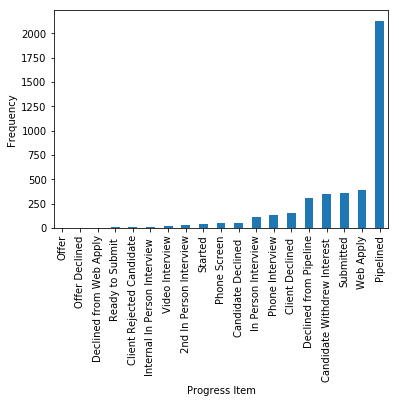

In [18]:
## What are the most frequent communications without requisition?
dfCandidates.groupby(by='Progress Item').count().sort_values(by='Candidate ID')['Candidate ID'].plot.bar()
plt.xlabel('Progress Item')
plt.ylabel('Frequency')
plt.show() 

### Data Cleaning - Requisition

In [19]:
dfRequisition.columns

Index(['Requisition', 'Date Created', 'Company', 'Job Title', 'Salary',
       'SAGE Fee', 'Status', 'Hired Date'],
      dtype='object')

In [20]:
dfRequisition.describe()
## No obvious errors

,Salary,SAGE Fee
count,37.000000,37.000000
mean,100180.945946,17644.462162
std,30746.299503,7304.340893
min,95.000000,0.000000
25%,81000.000000,14500.000000
50%,100000.000000,18000.000000
75%,110000.000000,22000.000000
max,177000.000000,35400.000000


In [21]:
## Null data
pd.isnull(dfRequisition).sum()
## Date Created seem to be fine. Let's look at the 85 that's missing for salary and see if they are in fact the same rows

Requisition      0
Date Created     1
Company          0
Job Title        0
Salary          85
SAGE Fee        85
Status           0
Hired Date      85
dtype: int64

In [22]:
# Check types
dfRequisition.dtypes
## Time is not date time format

Requisition      object
Date Created     object
Company          object
Job Title        object
Salary          float64
SAGE Fee        float64
Status           object
Hired Date       object
dtype: object

In [23]:
## Changing time to date-time format
dfRequisition['Date Created'] = pd.to_datetime(dfRequisition['Date Created'])
dfRequisition['Hired Date'] = pd.to_datetime(dfRequisition['Hired Date'])
dfRequisition.dtypes

Requisition             object
Date Created    datetime64[ns]
Company                 object
Job Title               object
Salary                 float64
SAGE Fee               float64
Status                  object
Hired Date      datetime64[ns]
dtype: object

In [24]:
## Data Frame of items with empty salary
dfRequisitionNullSalary = dfRequisition[pd.isnull(dfRequisition['Salary'])]
dfRequisitionNullSalary.head(5)

,Requisition,Date Created,Company,Job Title,Salary,SAGE Fee,Status,Hired Date
37,AA155723314,2018-03-14,Auvenir,Product Designer,NaN,NaN,Lost - Filled by Competitor,NaT
38,AA177112517,2018-05-17,Auvenir,.NET Developer,NaN,NaN,Canceled - By Recruiter,NaT
39,AA298282119,2018-01-19,Scribd,Software Engineer,NaN,NaN,Hold,NaT
40,AA3440461,2018-06-01,CaseWare International Inc.,C++ Developer,NaN,NaN,Hold,NaT
41,AA377528214,2018-02-14,DealTap,Director of Product Management,NaN,NaN,Lost - Filled by Competitor,NaT


In [25]:
## Checking if no salary data frame is the same as the ones with null SAGE fee
dfRequisitionNullSalary.equals(dfRequisition[pd.isnull(dfRequisition['SAGE Fee'])])
## Yes

True

In [26]:
## Checking if no salary data frame is the same as the ones with no Hired Date
dfRequisitionNullSalary.equals(dfRequisition[pd.isnull(dfRequisition['Hired Date'])])
## Yes

True

<font color = 'blue'> It seems clear that requisitions with empty Salary, SAGE Fee and Hired Date are for candidates who have not been hired. We can still conduct analysis with those empty rows there.</font>

## Correlations and Patterns from the Data

<i><b> 1. Which position are bringing in the most revenue? </b></i>

<font color = 'blue'>We should use the 'requisition' data frame, with only the rows that have SAGE fees. The problem, however, is that theres only 37 observations, so we can't really say how good the conclusion is.</font>

In [27]:
## Cleaning the data frame
dfRequisition1 = dfRequisition.dropna(axis=0, subset=['SAGE Fee'])
pd.isnull(dfRequisition1).sum()
## As expected dropped N/A for 'Salary' and 'Hired Date' too. We're not too bothered by the N/A for Date Created

Requisition     0
Date Created    1
Company         0
Job Title       0
Salary          0
SAGE Fee        0
Status          0
Hired Date      0
dtype: int64

In [28]:
dfRequisition1.describe()
## Sample size of 37!

,Salary,SAGE Fee
count,37.000000,37.000000
mean,100180.945946,17644.462162
std,30746.299503,7304.340893
min,95.000000,0.000000
25%,81000.000000,14500.000000
50%,100000.000000,18000.000000
75%,110000.000000,22000.000000
max,177000.000000,35400.000000


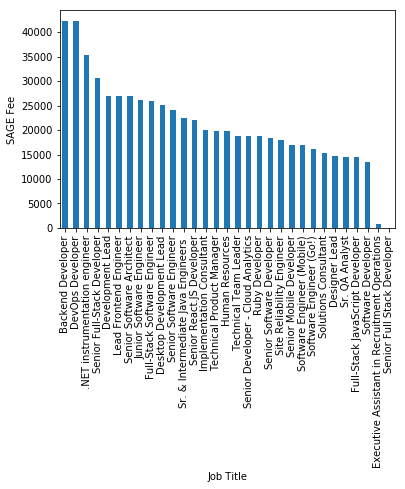

In [29]:
## Graphical Intuition
dfRequisition1Sorted = dfRequisition1.groupby('Job Title').sum().sort_values(by='SAGE Fee', ascending=False)

dfRequisition1Sorted['SAGE Fee'].plot.bar()
plt.xlabel('Job Title')
plt.ylabel('SAGE Fee')
plt.show()
## Note that this does not take into account the quantity of job placements

In [30]:
## Showing the Data Frame in Numbers
dfRequisition1Sorted
## The values for 'Senior Full Stack Developer' seems off

,Salary,SAGE Fee
Job Title,,
Backend Developer,235100.0,42318.0
DevOps Developer,235000.0,42300.0
.NET instrumentation engineer,177000.0,35400.0
Senior Full-Stack Developer,190000.0,30600.0
Development Lead,150000.0,27000.0
Lead Frontend Engineer,135000.0,27000.0
Senior Software Architect,150000.0,27000.0
Junior Software Engineer,145000.0,26100.0
Full-Stack Software Engineer,130000.0,26000.0


In [31]:
## Counting the number of jobs each position got
dfRequisition1Counted = dfRequisition1.groupby('Job Title').count()
dfRequisition1Counted

,Requisition,Date Created,Company,Salary,SAGE Fee,Status,Hired Date
Job Title,,,,,,,
.NET instrumentation engineer,1,1,1,1,1,1,1
Backend Developer,3,3,3,3,3,3,3
Designer Lead,1,1,1,1,1,1,1
Desktop Development Lead,1,1,1,1,1,1,1
DevOps Developer,2,2,2,2,2,2,2
Development Lead,1,1,1,1,1,1,1
Executive Assistant in Recruitment Operations,1,1,1,1,1,1,1
Full-Stack JavaScript Developer,1,1,1,1,1,1,1
Full-Stack Software Engineer,1,1,1,1,1,1,1


In [32]:
## We can compute another column, the average fees
dfRequisition1Sorted['Average Salary'] = dfRequisition1Sorted['Salary'] / dfRequisition1Counted['Requisition']
dfRequisition1Sorted['Average SAGE Fee'] = dfRequisition1Sorted['SAGE Fee'] / dfRequisition1Counted['Requisition']
dfRequisition1Sorted

,Salary,SAGE Fee,Average Salary,Average SAGE Fee
Job Title,,,,
Backend Developer,235100.0,42318.0,78366.666667,14106.0
DevOps Developer,235000.0,42300.0,117500.000000,21150.0
.NET instrumentation engineer,177000.0,35400.0,177000.000000,35400.0
Senior Full-Stack Developer,190000.0,30600.0,95000.000000,15300.0
Development Lead,150000.0,27000.0,150000.000000,27000.0
Lead Frontend Engineer,135000.0,27000.0,135000.000000,27000.0
Senior Software Architect,150000.0,27000.0,150000.000000,27000.0
Junior Software Engineer,145000.0,26100.0,72500.000000,13050.0
Full-Stack Software Engineer,130000.0,26000.0,130000.000000,26000.0


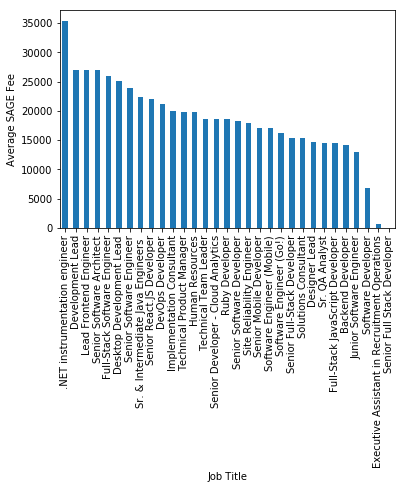

In [33]:
## Now we graphically examine it again
dfRequisition1Sorted.sort_values(by='Average SAGE Fee', ascending=False)['Average SAGE Fee'].plot.bar()
plt.xlabel('Job Title')
plt.ylabel('Average SAGE Fee')
plt.show()

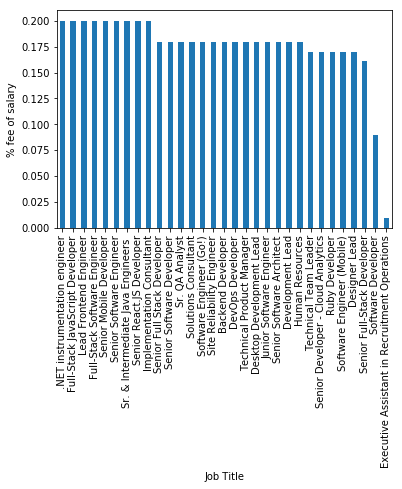

In [34]:
## How about ranking by percentage of SAGE fees in terms of salary?
dfRequisition1Sorted['% fee of salary'] = dfRequisition1Sorted['SAGE Fee'] / dfRequisition1Sorted['Salary']

dfRequisition1Sorted.sort_values(by='% fee of salary', ascending=False)['% fee of salary'].plot.bar()
plt.xlabel('Job Title')
plt.ylabel('% fee of salary')
plt.show()
## Not much use for this data here, seems like SAGE uses a fixed percentage based on job title.

<font color = 'blue'> If we go by <b>total SAGE fees</b>, the most valuable positions (top 3) for the company are <b>backend developer, devops developer and .NET instrumentation engineer</b>. If we go by average fees, the top 3 are <b>.NET instrumentation engineer, Development lead amd Lead frontend developer</b>. Whether or not SAGE wants to use total fees or average fees as a metric depends on their strategic goals. If efficiency is the goal, using average fees as the metric might be preferred. However, if a lot of effort is needed to place someone in a position with higher average fees, it may be worth it to just chase total fees.

<font color = 'blue'> The biggest concern with this analysis is that we only have a sample size of 37. In fact, only 4 job titles in total had more than one placement. Without some clustering or identification of the principal components of each individual job title the result obtained here is not reliable at all.</font>

<i><b> 2. What is the time spent on each successful placement? </b></i>

In [35]:
## First we examine the row item that has a null date
dfRequisition1[pd.isnull(dfRequisition1['Date Created'])]
## Clearly there's some error here while entering, we will get rid of this row

,Requisition,Date Created,Company,Job Title,Salary,SAGE Fee,Status,Hired Date
6,VA362518126,NaT,Red Cross,Sr. QA Analyst,81000.0,14580.0,Completed,2018-01-11


In [36]:
## Data cleaning
dfRequisition2 = dfRequisition1.dropna(axis=0, subset=['Date Created'])
pd.isnull(dfRequisition2).sum()

Requisition     0
Date Created    0
Company         0
Job Title       0
Salary          0
SAGE Fee        0
Status          0
Hired Date      0
dtype: int64

In [37]:
## Adding a time spent finding a job column
dfRequisition2['Time Spent'] = dfRequisition2['Hired Date'] - dfRequisition2['Date Created']
dfRequisition2.head(5)

C:\Users\Weiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Requisition,Date Created,Company,Job Title,Salary,SAGE Fee,Status,Hired Date,Time Spent
0,SD327202314,2018-03-14,The Working Group,Designer Lead,86000.0,14620.0,Completed,2018-06-03,81 days
1,MM702120613,2018-06-13,CaseWare International Inc.,Senior Developer - Cloud Analytics,110000.0,18700.0,Completed,2018-08-07,55 days
2,MM618861419,2018-04-19,CaseWare International Inc.,Development Lead,150000.0,27000.0,Completed,2018-06-11,53 days
3,AA20756542,2018-04-02,1Password,Backend Developer,80000.0,14400.0,Completed,2018-06-26,85 days
4,SD605017126,2018-01-26,ThinkData Works,Ruby Developer,110000.0,18700.0,Completed,2018-02-26,31 days


C:\Users\Weiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


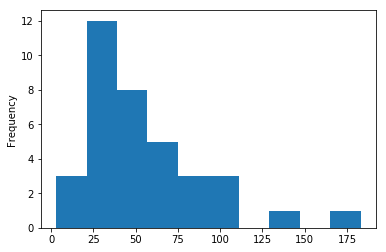

In [38]:
## Convert Time Spent so that we can draw histogram
dfRequisition2['Time Spent'] = (dfRequisition2['Time Spent']/np.timedelta64(1, 'D')).astype(int)

## Showing Time Spent on a histogram
dfRequisition2['Time Spent'].plot.hist()
## Seem to be right skewed, with most candidates finding work in less than 75 days.

In [39]:
## Descriptive Statistics
dfRequisition2['Time Spent'].describe()
## Mean of 54 days

count     36.000000
mean      53.944444
std       36.948570
min        3.000000
25%       31.000000
50%       41.000000
75%       71.000000
max      183.000000
Name: Time Spent, dtype: float64

In [40]:
dfRequisition2.dtypes

Requisition             object
Date Created    datetime64[ns]
Company                 object
Job Title               object
Salary                 float64
SAGE Fee               float64
Status                  object
Hired Date      datetime64[ns]
Time Spent               int32
dtype: object

In [41]:
## Seeing if the ones that fill last are in fact executive positions
dfRequisition2.sort_values(by='Time Spent', ascending=False)

,Requisition,Date Created,Company,Job Title,Salary,SAGE Fee,Status,Hired Date,Time Spent
32,MM567639919,2018-09-19,Turbonomic,Senior Software Engineer,120000.0,24000.0,Completed,2019-03-21,183
28,MM7510811127,2018-11-27,LotLinx,Senior Mobile Developer,85000.0,17000.0,Completed,2019-04-10,134
27,MM366107103,2018-10-03,ResQ,Software Engineer (Mobile),100000.0,17000.0,Completed,2019-01-21,110
8,AA460943811,2018-08-11,Firmex Inc.,Senior Full-Stack Developer,85000.0,12750.0,Completed,2018-11-16,97
26,AA460943811,2018-08-11,Firmex Inc.,Senior Full-Stack Developer,105000.0,17850.0,Completed,2018-11-13,94
3,AA20756542,2018-04-02,1Password,Backend Developer,80000.0,14400.0,Completed,2018-06-26,85
12,AA20756542,2018-04-02,1Password,Backend Developer,92600.0,16668.0,Completed,2018-06-25,84
0,SD327202314,2018-03-14,The Working Group,Designer Lead,86000.0,14620.0,Completed,2018-06-03,81
13,MM31879482,2018-08-02,CaseWare International Inc.,Site Reliability Engineer,100000.0,18000.0,Completed,2018-10-15,74
31,MM923645130,2019-01-30,Finaeo,Lead Frontend Engineer,135000.0,27000.0,Completed,2019-04-10,70


<font color = 'blue'> The quickest candidate took three days, and the most took 183 days. On average, 54 days is needed to place a candidate. There is a right skew, which is expected, as the most qualified candidates would've been placed earlier. The less qualified a candidate is, the longer it'll drag on.</font>

<i><b> 3. What are the features that are highly correlated with the time spent on a successful placement? For instance, does that depend on the job type or any of the candidate’s characteristics? </b></i>

In [42]:
import scipy

## Again, we use the requisition data, and we look at a correlation matrix
dfRequisition2.rank()
dfRequisition2.corr('kendall')
## Doesn't feel like there's any correlation at all with the quantitative variables

,Salary,SAGE Fee,Time Spent
Salary,1.000000,0.859570,0.006553
SAGE Fee,0.859570,1.000000,0.040355
Time Spent,0.006553,0.040355,1.000000


In [43]:
## Let's combine the datasets. First get the list of all requisition that has a time spent
successList = list(dfRequisition2['Requisition'])
successList

['SD327202314',
 'MM702120613',
 'MM618861419',
 'AA20756542',
 'SD605017126',
 'AA739519516',
 'SD898231116',
 'AA460943811',
 'AA624626316',
 'AA554833316',
 'AA20756542',
 'AA20756542',
 'MM31879482',
 'AA276030524',
 'MM50637582',
 'MM753013622',
 'MM64371626',
 'AA745972212',
 'AA555705316',
 'AA430057312',
 'AA370626414',
 'MM339506525',
 'MM408168919',
 'VA45373312',
 'AA276030524',
 'AA460943811',
 'MM366107103',
 'MM7510811127',
 'AA85086427',
 'MM353407123',
 'MM923645130',
 'MM567639919',
 'SA31736553',
 'AA85086427',
 'AA448082526',
 'AA50889134']

In [44]:
## Get a dataframe of all successful candidates
dfSuccessfulCandidates = dfCandidates[dfCandidates['Progress Item'] == 'Started']
dfSuccessfulCandidates

,Requisition,Candidate ID,Candidate Name,Progress Item,Date
11,AA20756542,5,Arthur Sepe,Started,2018-06-26
18,AA20756542,12,Craig Culp,Started,2018-05-09
20,AA20756542,13,Lois Holmes,Started,2018-06-25
55,AA276030524,34,Tonya Kennedy,Started,2018-07-22
67,AA276030524,40,Frida Bacher,Started,2018-06-26
107,AA370626414,62,Wanda Robertson,Started,2018-06-12
201,AA430057312,88,Gary Romanelli,Started,2018-04-13
254,AA460943811,147,Maris Maynard,Started,2018-11-16
380,AA460943811,195,Nanette Duhon,Started,2018-11-13
505,AA554833316,206,Darnell Vanhouten,Started,2018-03-23


In [45]:
## Get a list of unique candidate IDs
successIDs = list(dfSuccessfulCandidates[dfSuccessfulCandidates['Requisition'].isin(successList)]['Candidate ID'].unique())
successIDs

[5,
 12,
 13,
 34,
 40,
 62,
 88,
 147,
 195,
 206,
 283,
 333,
 433,
 456,
 757,
 782,
 809,
 835,
 547,
 932,
 445,
 1033,
 709,
 1089,
 1105,
 1358,
 331,
 1454,
 1589,
 1646,
 1684,
 1784,
 1797,
 1848,
 1888,
 1618]

In [46]:
## Slice the activities data frame for those IDs
dfSuccessfulActivities = dfActivities[dfActivities['Candidate ID'].isin(successIDs)]
dfSuccessfulActivities.head(5)

,Date,Candidate ID,Candidate Name,Sage Representative,Requisition,Type of Activity
4,2019-01-03 16:46:06,809,Sue Fannin,Ashley Alfred,NaN,Email Received
6,2019-01-06 14:25:55,835,Robert Brown,Ashley Alfred,NaN,Email Received
7,2019-01-06 14:26:21,835,Robert Brown,Ashley Alfred,NaN,Email Received
9,2019-01-07 10:22:34,835,Robert Brown,Ashley Alfred,NaN,Email Received
12,2019-01-07 17:03:06,835,Robert Brown,Ashley Alfred,NaN,Email Received


In [47]:
## Are there rows with a requisition?
dfSuccessfulActivities['Requisition'].unique()
## Yes

array([nan, 'SD327202314', 'MM230281327', 'AA739519516', 'MM618861419',
       'AA370626414', 'MM326665427', 'AA20756542', 'MM855852518',
       'AA89228459', 'MM50637582', 'AA460943811', 'MM438024103',
       'MM702120613', 'MM948000618', 'MM64371626', 'MM31879482',
       'MM408168919', 'MM366107103', 'MM353407123', 'AA85086427',
       'AA322751216', 'SA31736553', 'AA50889134', 'AA448082526',
       'AA624626316', 'AA745972212', 'AA555705316', 'AA177112517',
       'AA276030524', 'VA10197412', 'MM753013622', 'MM10095582',
       'MM567639919', 'MM5226371129', 'MM923645130', 'AA561212',
       'MM7510811127', 'AA371919314', 'AA702835314', 'SA52114172'],
      dtype=object)

In [48]:
## A variable that could be useful is how many communication each successful candidate had before being hired. It is more useful
## if we can also split them up into the type of activity
for cols in list(dfSuccessfulActivities['Type of Activity'].unique()):
    dfSuccessfulActivities[cols] = np.where(dfSuccessfulActivities['Type of Activity']==cols, 1, 0)
## Assigns 1 if Type of Activity matches the column name

dfSuccessfulActivities.head(5)

C:\Users\Weiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Date,Candidate ID,Candidate Name,Sage Representative,Requisition,Type of Activity,Email Received,Call Scheduled,Email Sent,Pipelined,Submitted
4,2019-01-03 16:46:06,809,Sue Fannin,Ashley Alfred,NaN,Email Received,1,0,0,0,0
6,2019-01-06 14:25:55,835,Robert Brown,Ashley Alfred,NaN,Email Received,1,0,0,0,0
7,2019-01-06 14:26:21,835,Robert Brown,Ashley Alfred,NaN,Email Received,1,0,0,0,0
9,2019-01-07 10:22:34,835,Robert Brown,Ashley Alfred,NaN,Email Received,1,0,0,0,0
12,2019-01-07 17:03:06,835,Robert Brown,Ashley Alfred,NaN,Email Received,1,0,0,0,0


In [49]:
## Now, we sum
dfSuccessfulActivitiesSum = dfSuccessfulActivities.groupby(by='Candidate ID').sum()
dfSuccessfulActivitiesSum

,Email Received,Call Scheduled,Email Sent,Pipelined,Submitted
Candidate ID,,,,,
5,0,0,0,4,3
12,0,0,1,0,0
13,9,0,10,0,2
34,1,0,0,0,1
40,0,0,0,0,1
62,0,0,0,0,1
147,18,0,9,3,2
195,21,0,16,1,3
283,0,0,0,0,1


In [50]:
## Note that after all these progress, 6 candidates were not found to be in the candidates dataset
dfSuccessfulActivitiesSum.count()

Email Received    30
Call Scheduled    30
Email Sent        30
Pipelined         30
Submitted         30
dtype: int64

In [51]:
## Add the above to dfSuccessfulCandidates
dfSuccessfulCandidates = pd.merge(dfSuccessfulCandidates, dfSuccessfulActivitiesSum, on='Candidate ID')
dfSuccessfulCandidates
## We see here that the requisition is actually not unique, and that may be a problem!

,Requisition,Candidate ID,Candidate Name,Progress Item,Date,Email Received,Call Scheduled,Email Sent,Pipelined,Submitted
0,AA20756542,5,Arthur Sepe,Started,2018-06-26,0,0,0,4,3
1,AA20756542,12,Craig Culp,Started,2018-05-09,0,0,1,0,0
2,AA20756542,13,Lois Holmes,Started,2018-06-25,9,0,10,0,2
3,AA276030524,34,Tonya Kennedy,Started,2018-07-22,1,0,0,0,1
4,AA276030524,40,Frida Bacher,Started,2018-06-26,0,0,0,0,1
5,AA370626414,62,Wanda Robertson,Started,2018-06-12,0,0,0,0,1
6,AA460943811,147,Maris Maynard,Started,2018-11-16,18,0,9,3,2
7,AA460943811,195,Nanette Duhon,Started,2018-11-13,21,0,16,1,3
8,AA555705316,283,Herbert Harper,Started,2018-03-19,0,0,0,0,1
9,AA624626316,333,Priscilla Holme,Started,2018-03-19,0,0,0,0,1


In [52]:
## dfRequisition2 again
dfRequisition2

,Requisition,Date Created,Company,Job Title,Salary,SAGE Fee,Status,Hired Date,Time Spent
0,SD327202314,2018-03-14,The Working Group,Designer Lead,86000.0,14620.0,Completed,2018-06-03,81
1,MM702120613,2018-06-13,CaseWare International Inc.,Senior Developer - Cloud Analytics,110000.0,18700.0,Completed,2018-08-07,55
2,MM618861419,2018-04-19,CaseWare International Inc.,Development Lead,150000.0,27000.0,Completed,2018-06-11,53
3,AA20756542,2018-04-02,1Password,Backend Developer,80000.0,14400.0,Completed,2018-06-26,85
4,SD605017126,2018-01-26,ThinkData Works,Ruby Developer,110000.0,18700.0,Completed,2018-02-26,31
5,AA739519516,2018-05-16,ResQ,Technical Team Leader,110000.0,18700.0,Completed,2018-07-05,50
7,SD898231116,2018-01-16,Firmex Inc.,Senior Full Stack Developer,95.0,17.1,Completed,2018-03-05,48
8,AA460943811,2018-08-11,Firmex Inc.,Senior Full-Stack Developer,85000.0,12750.0,Completed,2018-11-16,97
9,AA624626316,2018-03-16,1Password,Human Resources,110000.0,19800.0,Completed,2018-03-19,3
10,AA554833316,2018-03-16,1Password,Software Developer,75000.0,13500.0,Completed,2018-03-23,7


In [53]:
## We attempt to merge the 2 using both 'Requisition' and 'Date Created'
dfMerged = dfRequisition2.merge(dfSuccessfulCandidates, how='inner', left_on=['Requisition', 'Hired Date'], right_on=['Requisition', 'Date'])
dfMerged

,Requisition,Date Created,Company,Job Title,Salary,SAGE Fee,Status,Hired Date,Time Spent,Candidate ID,Candidate Name,Progress Item,Date,Email Received,Call Scheduled,Email Sent,Pipelined,Submitted
0,SD327202314,2018-03-14,The Working Group,Designer Lead,86000.0,14620.0,Completed,2018-06-03,81,1358,Christopher Hoffman,Started,2018-06-03,5,0,4,1,1
1,MM702120613,2018-06-13,CaseWare International Inc.,Senior Developer - Cloud Analytics,110000.0,18700.0,Completed,2018-08-07,55,709,Meg Russell,Started,2018-08-07,3,0,3,2,1
2,MM618861419,2018-04-19,CaseWare International Inc.,Development Lead,150000.0,27000.0,Completed,2018-06-11,53,445,Chester Boston,Started,2018-06-11,6,0,11,2,3
3,AA20756542,2018-04-02,1Password,Backend Developer,80000.0,14400.0,Completed,2018-06-26,85,5,Arthur Sepe,Started,2018-06-26,0,0,0,4,3
4,AA739519516,2018-05-16,ResQ,Technical Team Leader,110000.0,18700.0,Completed,2018-07-05,50,433,Ann Hansford,Started,2018-07-05,0,0,0,1,1
5,AA460943811,2018-08-11,Firmex Inc.,Senior Full-Stack Developer,85000.0,12750.0,Completed,2018-11-16,97,147,Maris Maynard,Started,2018-11-16,18,0,9,3,2
6,AA624626316,2018-03-16,1Password,Human Resources,110000.0,19800.0,Completed,2018-03-19,3,333,Priscilla Holme,Started,2018-03-19,0,0,0,0,1
7,AA20756542,2018-04-02,1Password,Backend Developer,62500.0,11250.0,Completed,2018-05-09,37,12,Craig Culp,Started,2018-05-09,0,0,1,0,0
8,AA20756542,2018-04-02,1Password,Backend Developer,92600.0,16668.0,Completed,2018-06-25,84,13,Lois Holmes,Started,2018-06-25,9,0,10,0,2
9,MM31879482,2018-08-02,CaseWare International Inc.,Site Reliability Engineer,100000.0,18000.0,Completed,2018-10-15,74,757,Sarah Evans,Started,2018-10-15,3,0,3,1,2


NormaltestResult(statistic=15.085166718063174, pvalue=0.0005300266026324745)

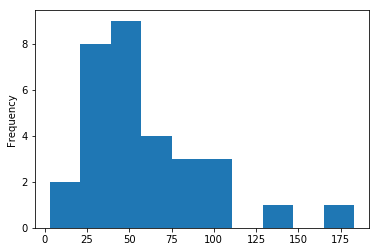

In [54]:
## Now, we can conduct a proper correlation analysis. First we see if the data is normal
dfMerged['Time Spent'].plot.hist()

## Test for normality
from scipy import stats

stats.normaltest(dfMerged['Time Spent'])
## Data is in fact normal! But note small sample

In [55]:
## Correlation matrix
dfMerged.rank()
dfMerged.corr('kendall')

,Salary,SAGE Fee,Time Spent,Candidate ID,Email Received,Call Scheduled,Email Sent,Pipelined,Submitted
Salary,1.000000,0.862830,0.026637,-0.006565,-0.075643,-0.078655,-0.048023,0.000000,0.033649
SAGE Fee,0.862830,1.000000,0.054948,0.039003,-0.043124,0.024922,-0.020379,-0.030569,0.038871
Time Spent,0.026637,0.054948,1.000000,-0.087632,0.158339,0.075593,0.215198,0.190591,0.362125
Candidate ID,-0.006565,0.039003,-0.087632,1.000000,0.533907,0.589982,0.492020,0.017774,-0.094094
Email Received,-0.075643,-0.043124,0.158339,0.533907,1.000000,0.526908,0.855794,0.167557,0.179726
Call Scheduled,-0.078655,0.024922,0.075593,0.589982,0.526908,1.000000,0.548378,0.018253,0.099470
Email Sent,-0.048023,-0.020379,0.215198,0.492020,0.855794,0.548378,1.000000,0.188388,0.222681
Pipelined,0.000000,-0.030569,0.190591,0.017774,0.167557,0.018253,0.188388,1.000000,0.553098
Submitted,0.033649,0.038871,0.362125,-0.094094,0.179726,0.099470,0.222681,0.553098,1.000000


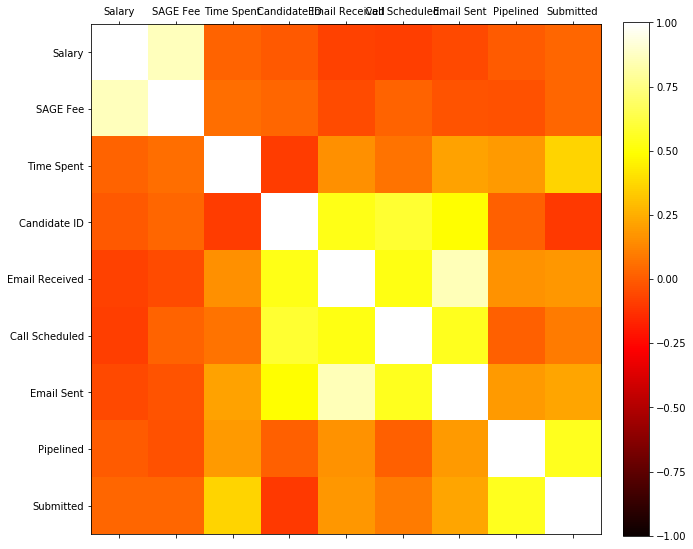

In [56]:
## A heat map
dfCorrelation = dfMerged.corr('kendall')
fig = plt.figure() 
plot_axes = fig.add_subplot(111) 
heatmap = plot_axes.matshow(dfCorrelation, vmin=-1, vmax=1, cmap='hot')
fig.colorbar(heatmap, fraction=0.046, pad=0.04)
ticks = np.arange(0, dfCorrelation.columns.size, 1)
plot_axes.set_xticks(ticks)
plot_axes.set_yticks(ticks)
plot_axes.set_yticklabels(dfCorrelation.columns.values)
plot_axes.set_xticklabels(dfCorrelation.columns.values)
fig.set_size_inches((10,10))
plt.show()

<font color = 'blue'> We'll leave our analysis here for now. We see that 'Time Spent' is not very correlated with the fees, but shows slightly stronger correlation with the communications frequency. That is almost expected. It could be that the more time someone spent with SAGE, the more communications they have with SAGE. This is logical.</font>

<i><b>4. Are there any correlations between time investment and revenues during placement?</b></i>

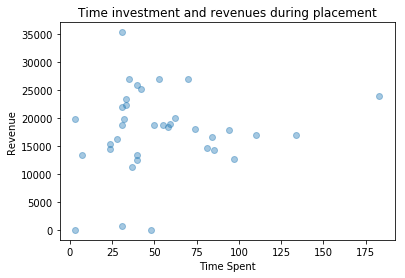

In [57]:
## We believe there isn't any correlation from the correlation matrix, but let's look at the graphical intuition
plt.scatter(dfRequisition2['Time Spent'], dfRequisition2['SAGE Fee'], alpha = 0.4)
plt.xlabel('Time Spent')
plt.ylabel("Revenue")
plt.title("Time investment and revenues during placement")
plt.show()
## Looks randomly distributed

In [58]:
## P-values?? Ask prof.

<i><b>5. What are the factors that are associated with placements being successful or not? For instance, is success correlated to any features of jobs or candidates?</b></i>

<font color = 'blue'> This actually seems more like a survival analysis/principal components question. If not, a logistic regression. We should ask the professor.</font>

## Generating Variables from dfCandidate